In [1]:
! /opt/nest/bin/nest-server start -d -p 52425

NEST Server is already running at http://0.0.0.0:52425.


In [2]:
from nest_client import *

# # -*- coding: utf-8 -*-
# #
# # nest_client.py
# #
# # This file is part of NEST.
# #
# # Copyright (C) 2004 The NEST Initiative
# #
# # NEST is free software: you can redistribute it and/or modify
# # it under the terms of the GNU General Public License as published by
# # the Free Software Foundation, either version 2 of the License, or
# # (at your option) any later version.
# #
# # NEST is distributed in the hope that it will be useful,
# # but WITHOUT ANY WARRANTY; without even the implied warranty of
# # MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# # GNU General Public License for more details.
# #
# # You should have received a copy of the GNU General Public License
# # along with NEST.  If not, see <http://www.gnu.org/licenses/>.

# import requests
# from werkzeug.exceptions import BadRequest


# __all__ = [
#     'NESTClient',
# ]


# def encode(response):
#     if response.ok:
#         return response.json()
#     elif response.status_code == 400:
#         raise BadRequest(response.text)


# class NESTClient:

#     def __init__(self, host='localhost', port=52425):
#         self.url = 'http://{}:{}/'.format(host, port)
#         self.headers = {'Content-type': 'application/json', 'Accept': 'text/plain'}

#     def __getattr__(self, call):
#         def method(*args, **kwargs):
#             kwargs.update({'args': args})
#             response = requests.post(self.url + 'api/' + call, json=kwargs, headers=self.headers)
#             return encode(response)
#         return method

#     def exec_script(self, source, return_vars=None):
#         params = {
#             'source': source,
#             'return': return_vars,
#         }
#         response = requests.post(self.url + 'exec', json=params, headers=self.headers)
#         return encode(response)

#     def from_file(self, filename, return_vars=None):
#         with open(filename, 'r') as f:
#             lines = f.readlines()
#         script = ''.join(lines)
#         print('Execute script code of {}'.format(filename))
#         print('Return variables: {}'.format(return_vars))
#         print(20 * '-')
#         print(script)
#         print(20 * '-')
#         return self.exec_script(script, return_vars)

In [3]:
nest = NESTClient(port=52425)


In [4]:
nest.ResetKernel()
nest.GetKernelStatus("biological_time")

0.0

In [5]:
# Create nodes
params = {"rate_times": [250.0, 500.0, 750.0], 
          "rate_values": [10000.0, 20000.0, 10000.0]}
pg = nest.Create("inhomogeneous_poisson_generator", 1, params)
neurons = nest.Create("iaf_psc_alpha", 1000)
sr = nest.Create("spike_recorder")

# Connect nodes
nest.Connect(pg, neurons, syn_spec={'weight': 10.})
nest.Connect(neurons[::10], sr)


In [6]:

# Simulate
nest.Simulate(1000.0)



In [7]:
# Get events
events = nest.GetStatus(sr, 'events')[0]
n_events = nest.GetStatus(sr, 'n_events')[0]
print('Number of events:', n_events)

Number of events: 7488


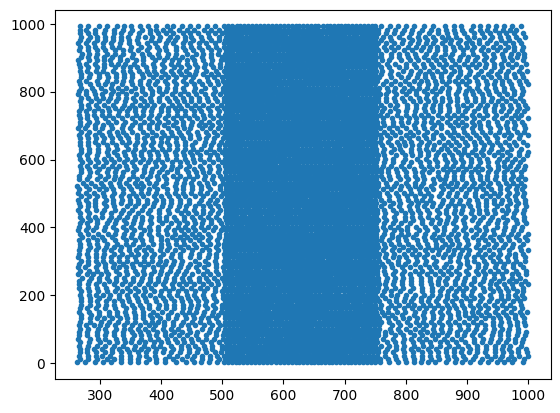

In [8]:
from matplotlib import pyplot
pyplot.plot(events["times"], events["senders"], '.')

In [9]:
neurons

[2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 1

In [10]:
! /opt/nest/bin/nest-server stop

NEST Server is not running at http://0.0.0.0:5000.
